# Head model and forward computation

In [1]:
from saflow import FS_SUBJDIR
import mne

subjects_dir = FS_SUBJDIR
subject = 'sub-05'
raw_fname ='/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_meg.fif'
trans = '/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_trans.fif'


In [14]:
# Everything
info = mne.io.read_info(raw_fname)
src = mne.setup_source_space(
    subject, spacing="oct4", add_dist="patch", subjects_dir=subjects_dir
)

conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(
    subject=subject, ico=4, conductivity=conductivity, subjects_dir=subjects_dir
)
bem = mne.make_bem_solution(model)

fwd = mne.make_forward_solution(
    raw_fname,
    trans=trans,
    src=src,
    bem=bem,
    meg=True,
    eeg=False,
    mindist=5.0,
    n_jobs=None,
    verbose=True,
)


FileNotFoundError: [Errno 2] No such file or directory: '/media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_meg.fif'

Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/outer_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/outer_skin.surf


/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


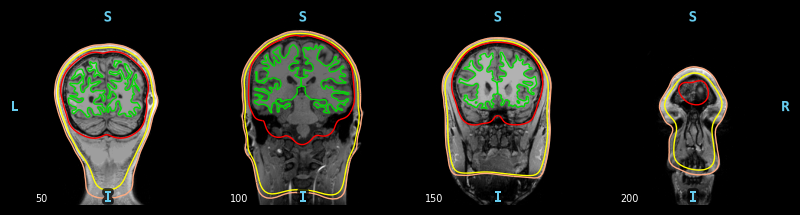

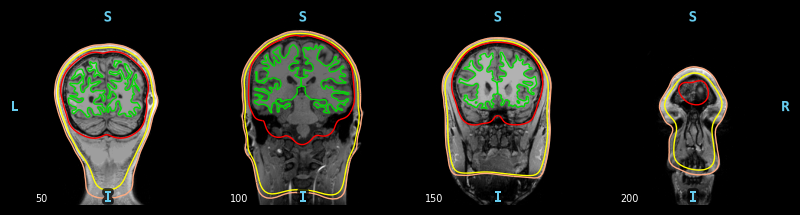

In [2]:

plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    brain_surfaces="white",
    orientation="coronal",
    slices=[50, 100, 150, 200],
)

mne.viz.plot_bem(**plot_bem_kwargs)

In [3]:

info = mne.io.read_info(raw_fname)
# Here we look at the dense head, which isn't used for BEM computations but
# is useful for coregistration.
mne.viz.plot_alignment(
    info,
    trans,
    subject=subject,
    dig=True,
    meg=["helmet", "sensors"],
    subjects_dir=subjects_dir,
    surfaces="head-dense",
)

    Read 5 compensation matrices
Using pyvistaqt 3d backend.



RuntimeError: 

In [4]:
# Setup source space
src = mne.setup_source_space(
    subject, spacing="oct4", add_dist="patch", subjects_dir=subjects_dir
)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects
Subject      = sub-05
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/surf/lh.white...
Mapping lh sub-05 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/149584 selected to source space (oct = 4)

Loading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/surf/rh.white...
Mapping rh sub-05 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded

Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/outer_skull.surf
Using surface: /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/outer_skin.surf


/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


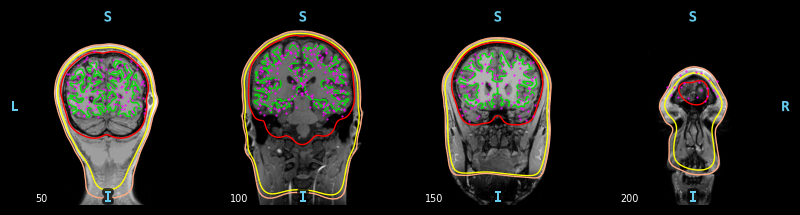

In [5]:
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

Sphere                : origin at (0.0 0.0 40.0) mm
              radius  : 90.0 mm
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz

Reading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz...

Setting up the sphere...
Surface CM = (   0.0    0.0   40.0) mm
Surface fits inside a sphere with radius   90.0 mm
Surface extent:
    x =  -90.0 ...   90.0 mm
    y =  -90.0 ...   90.0 mm
    z =  -50.0 ...  130.0 mm
Grid extent:
    x =  -95.0 ...   95.0 mm
    y =  -95.0 ...   95.0 mm
    z =  -50.0 ...  135.0 mm
57798 sources before omitting any.
24365 sources after omitting infeasible sources not within 0.0 - 90.0 mm.
20377 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -95.00 mm
     0.000000

/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


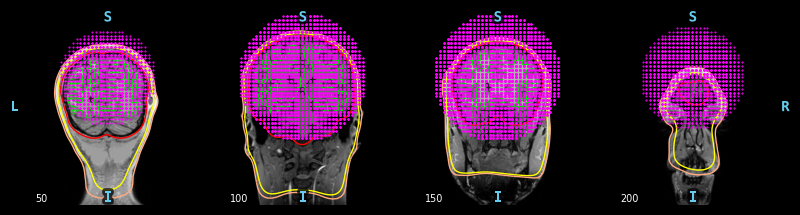

In [6]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(
    subject,
    subjects_dir=subjects_dir,
    sphere=sphere,
    sphere_units="m",
    add_interpolator=False,
)  # just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

In [7]:

fig = mne.viz.plot_alignment(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="white",
    coord_frame="mri",
    src=src,
)
mne.viz.set_3d_view(
    fig,
    azimuth=173.78,
    elevation=101.75,
    distance=0.30,
    focalpoint=(-0.03, -0.01, 0.03),
)

RuntimeError: 

Boundary surface file : /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz

Reading /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/mri/T1.mgz...

Loaded bounding surface from /media/hyruuk/CoCoLabYANN/coco_data/saflow/fs_subjects/sub-05/bem/inner_skull.surf (10242 nodes)
Surface CM = (  -1.1  -24.3   24.7) mm
Surface fits inside a sphere with radius  100.4 mm
Surface extent:
    x =  -70.9 ...   68.9 mm
    y = -108.8 ...   75.0 mm
    z =  -51.7 ...   95.2 mm
Grid extent:
    x =  -75.0 ...   70.0 mm
    y = -110.0 ...   75.0 mm
    z =  -55.0 ...  100.0 mm
36480 sources before omitting any.
28622 sources after omitting infeasible sources not within 0.0 - 100.4 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface and at least    5.0 mm away (wil

/home/hyruuk/mambaforge/envs/saflow/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


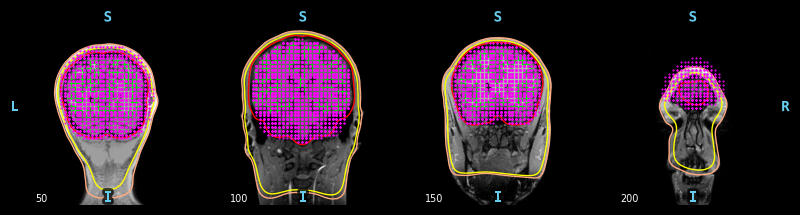

In [ ]:
surface = subjects_dir + '/' + subject + "/bem" + "/inner_skull.surf"
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, surface=surface, add_interpolator=False
)  # Just for speed!
print(vol_src)

mne.viz.plot_bem(src=vol_src, **plot_bem_kwargs)

In [9]:
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(
    subject=subject, ico=4, conductivity=conductivity, subjects_dir=subjects_dir
)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -1.10 -24.30  24.65 mm
Surfaces passed the basic topology checks.
Complete.

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [10]:
fwd = mne.make_forward_solution(
    raw_fname,
    trans=trans,
    src=src,
    bem=bem,
    meg=True,
    eeg=False,
    mindist=5.0,
    n_jobs=None,
    verbose=True,
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=149584, n_used=258>, <surface (rh), n_vertices=150656, n_used=258>] MRI (surface RAS) coords, subject 'sub-05', ~27.6 MB>
MRI -> head transform : /media/hyruuk/CoCoLabYANN/coco_data/saflow/bids_with_manual_coreg/sub-05/meg/sub-05_task-gradCPT_run-02_trans.fif
Measurement data      : sub-05_task-gradCPT_run-02_meg.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 516 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999880 -0.007040  0.013768      -0.88 mm
     0.005410  0.993349  0.115013      17.97 mm
    -0.014486 -0.114925  0.993269      21.96 mm
     0.000000  0.000000  0.000000       1.00

Read 299 MEG channels from info
Read 29 MEG compensation channels from info
5 compensation data sets in info
Setting up compensation data...
    Desired compensation data (3)

In [11]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=149584, n_used=258>, <surface (rh), n_vertices=150656, n_used=258>] MRI (surface RAS) coords, subject 'sub-05', ~27.6 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=149584, n_used=258>, <surface (rh), n_vertices=150656, n_used=258>] head coords, subject 'sub-05', ~27.6 MB>


In [12]:
leadfield = fwd["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

Leadfield size : 270 sensors x 1548 dipoles


In [13]:
fwd_fixed = mne.convert_forward_solution(
    fwd, surf_ori=True, force_fixed=True, use_cps=True
)
leadfield = fwd_fixed["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)




    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Leadfield size : 270 sensors x 516 dipoles
